# 4. Empirical Analysis of ETFs

In [3]:
import yfinance as yf
import pandas as pd

### Defining the symbols

In [4]:
# List of stock symbols for the TECH top 30 holdings
symbols = [
    'MSFT', 'VNET', 'SCHW', 'COST', 'SBUX', 'NTES', 'MS', 'GLOB', 
    'NICE', 'TXN', 'DUK', 'AMZN', 'MMM', 'MA', 'DIS', 'TAL', 'BILI', 
    'AAPL', 'BRK-A', 'PG', 'TSLA', 'C', 'RTX', 'PM', 'TWLO', 'TTD', 'V', 
    'IQ', 'GOOGL', 'ROKU', 'NEE', 'GSX', 'FB', 'HUYA', 'HUBS', 'INTC', 
    'PDD', 'DDOG', 'BIDU', 'PEP', 'VIPS', 'ORCL', 'TCEHY', 'IBM', 'JPM', 
    'UNP', 'ZM', 'AMGN', 'AXP', 'SQ', 'LYFT', 'SPOT', 'CMCSA', 'TME', 
    'LOW', 'SO', 'INTU', 'GOOG', 'PYPL', 'HD', 'MTCH', 'LMT', 'JD', 
    'T', 'COIN', 'MDT', 'SNOW', 'WDAY', 'SHOP', 'TEAM', 'USB', 'UBER', 
    'XOM', 'YUMC', 'MELI', 'WMT', 'TMO', 'BLK', 'BZUN', 'MDB', 'DHR', 
    'SPG', 'YY', 'NKE', 'MRK', 'JNJ', 'UNH', 'ADBE', 'LIN', 'CTSH', 'KO', 
    'MCD', 'CAT', 'QCOM', 'ABBV', 'CSCO', 'BABA', 'NVDA', 'PINS', 'AMD', 
    'ESTC', 'VZ', 'EPAM', 'KING', 'DOYU', 'ZTO', 'GS', 'UPS', 'BAC', 
    'CRM', 'BRK-B', 'CVX', 'SPLK', 'NFLX', 'PFE', 'BA', 'HON', 'ACN', 
    'NET', 'FISV', 'ADP', 'EDU', 'JOYY'
    ]


# Define the start and end dates
from datetime import datetime, timedelta

end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date
start_date = (datetime.today() - timedelta(days=180)).strftime('%Y-%m-%d')  # 6 months ago

### Downloading data filtering by availability

In [34]:
############################################
# EXECUTE THIS CELL ONLY ONCE
############################################

# Download historical data for each symbol and save to CSV
import logging

# Set up logging
logging.basicConfig(filename='data_processing.log', level=logging.ERROR)

high_quality_tickers = []
for symbol in symbols:
    # Ensure to download exactly 30 symbols
    if len(high_quality_tickers) >= 30:
        break
    print(f"Downloading data for {symbol}...")
    
    # Attempt to download at least 1000 data points
    df = yf.download(symbol, period="max", interval="1d")
    
    # Check if the DataFrame has at least 1000 data points
    if len(df) < 1000:
        print(f"Skipping {symbol} due to insufficient data points.")
        continue
    
    # Check if the DataFrame is empty or has more than 50% NaNs
    if df.empty or df.isna().mean().mean() > 0.5:
        print(f"Skipping {symbol} due to insufficient data.")
        continue
    
    # Check for NaNs and skip if any are present
    if df.isna().any().any():
        print(f"Skipping {symbol} due to presence of NaNs.")
        continue
    
    df.insert(0, 'Ticker', symbol)  # Add a Ticker column
    df.reset_index(inplace=True)  # Ensure Date is a column
    df = df[['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']]  # Reorder columns
    output_file = f"{symbol}_last_6_months.csv"
    df.to_csv(output_file, index=False)  # Save to CSV without the index
    
    # Remove the second row from the CSV file
    with open(output_file, 'r') as file:
        lines = file.readlines()
    with open(output_file, 'w') as file:
        file.writelines(lines[:1] + lines[2:])
    
    print(f"Data for {symbol} has been saved to {output_file}")
    high_quality_tickers.append(symbol)

# Concatenate all CSV files into a single DataFrame and save as one file
import glob

# Get a list of all CSV files created above
csv_files = glob.glob("*_last_6_months.csv")

# Read each CSV file and concatenate them into a single DataFrame
df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file, usecols=['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'])
        df_list.append(df)
    except ValueError as e:
        if "Usecols do not match columns, columns expected but not found: ['Date', 'Ticker']" in str(e):
            logging.error(f"Error in file {file}: {e}")
        else:
            raise

# Concatenate all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a single CSV file
combined_df.to_csv("combined_last_6_months.csv", index=False)

print("All data has been concatenated and saved to combined_last_6_months.csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for MSFT has been saved to MSFT_last_6_months.csv


Data for VNET has been saved to VNET_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for SCHW has been saved to SCHW_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for COST has been saved to COST_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for SBUX has been saved to SBUX_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for NTES has been saved to NTES_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for MS has been saved to MS_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for GLOB has been saved to GLOB_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for NICE has been saved to NICE_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for TXN has been saved to TXN_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for DUK has been saved to DUK_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for AMZN has been saved to AMZN_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for MMM has been saved to MMM_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for MA has been saved to MA_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for DIS has been saved to DIS_last_6_months.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for TAL has been saved to TAL_last_6_months.csv
Data for BILI has been saved to BILI_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for AAPL has been saved to AAPL_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for BRK-A has been saved to BRK-A_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for PG has been saved to PG_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for TSLA has been saved to TSLA_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for C has been saved to C_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for RTX has been saved to RTX_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for PM has been saved to PM_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for TWLO has been saved to TWLO_last_6_months.csv


[*********************100%***********************]  1 of 1 completed


Data for TTD has been saved to TTD_last_6_months.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for V has been saved to V_last_6_months.csv
Data for IQ has been saved to IQ_last_6_months.csv



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for GOOGL has been saved to GOOGL_last_6_months.csv
Data for ROKU has been saved to ROKU_last_6_months.csv


All data has been concatenated and saved to combined_last_6_months.csv


### Processing downloaded data

In [5]:
combined_df = pd.read_csv("combined_last_6_months.csv", dtype={'Ticker': str, 'Close': float, 'High': float, 'Low': float, 'Open': float, 'Volume': float}, parse_dates=['Date'])

# Compute the daily returns
combined_df['Daily_Return'] = combined_df.groupby('Ticker')['Close'].pct_change()

# Save the DataFrame with daily returns to a new CSV file
combined_df.to_csv("combined_last_6_months_with_returns.csv", index=False)

print("Daily returns have been computed and saved to combined_last_6_months_with_returns.csv")

combined_df.head()

Daily returns have been computed and saved to combined_last_6_months_with_returns.csv


,Date,Ticker,Close,High,Low,Open,Volume,Daily_Return
0,2010-06-29,TSLA,1.592667,1.666667,1.169333,1.266667,281494500.0,NaN
1,2010-06-30,TSLA,1.588667,2.028000,1.553333,1.719333,257806500.0,-0.002511
2,2010-07-01,TSLA,1.464000,1.728000,1.351333,1.666667,123282000.0,-0.078473
3,2010-07-02,TSLA,1.280000,1.540000,1.247333,1.533333,77097000.0,-0.125683
4,2010-07-06,TSLA,1.074000,1.333333,1.055333,1.333333,103003500.0,-0.160937


In [6]:
len(combined_df)/30

7639.7

In [7]:
tickers = list(combined_df['Ticker'].unique())
print(tickers)
print(len(tickers))

['TSLA', 'NTES', 'BILI', 'MMM', 'PM', 'BRK-A', 'V', 'IQ', 'GOOGL', 'MA', 'COST', 'AMZN', 'TWLO', 'C', 'ROKU', 'MS', 'PG', 'TAL', 'TTD', 'MSFT', 'GLOB', 'SBUX', 'VNET', 'NICE', 'RTX', 'TXN', 'SCHW', 'AAPL', 'DIS', 'DUK']
30


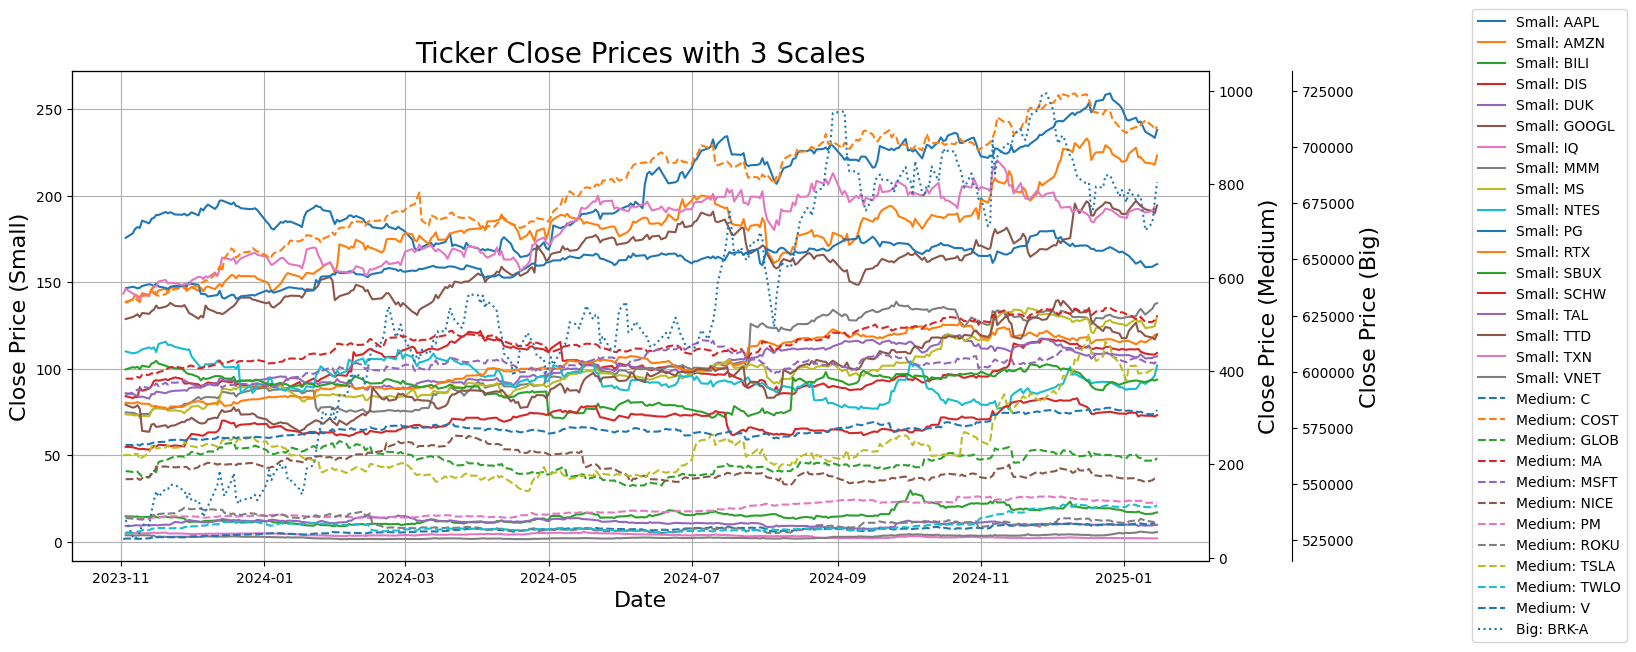

In [16]:
import matplotlib.pyplot as plt

# Calculate the average Close price for each ticker
average_close_prices = combined_df.groupby('Ticker')['Close'].mean()

# Define price ranges for small, medium, and big groups
small_threshold = 50
medium_threshold = 450
big_threshold = 700000

# Classify tickers into small, medium, and big groups
small_tickers = average_close_prices[average_close_prices <= small_threshold].index
medium_tickers = average_close_prices[(average_close_prices > small_threshold) & (average_close_prices <= medium_threshold)].index
big_tickers = average_close_prices[(average_close_prices > medium_threshold) & (average_close_prices <= big_threshold)].index

# Create a single plot with 3 scales
fig, ax = plt.subplots(figsize=(14, 6))

# Plot small tickers on the first scale
ax_small = ax
for ticker in small_tickers:
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    ax_small.plot(ticker_data['Date'], ticker_data['Close'], label=f'Small: {ticker}')

# Plot medium tickers on the second scale
ax_medium = ax.twinx()
for ticker in medium_tickers:
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    ax_medium.plot(ticker_data['Date'], ticker_data['Close'], label=f'Medium: {ticker}', linestyle='--')

# Plot big tickers on the third scale
ax_big = ax.twinx()
ax_big.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
for ticker in big_tickers:
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    ax_big.plot(ticker_data['Date'], ticker_data['Close'], label=f'Big: {ticker}', linestyle=':')

# Set plot title and labels with increased font size
ax.set_title('Ticker Close Prices with 3 Scales', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Close Price (Small)', fontsize=16)
ax_medium.set_ylabel('Close Price (Medium)', fontsize=16)
ax_big.set_ylabel('Close Price (Big)', fontsize=16)
ax.grid(True)

# Combine legends from all axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_medium.get_legend_handles_labels()
lines3, labels3 = ax_big.get_legend_handles_labels()

# Add the legend to the plot, located outside the plotting area on the left
fig.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='center left', fontsize=10, ncol=1, bbox_to_anchor=(1.05, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/zt/2fc2dgl527j0fpwfk176q2k40000gn/T/ipykernel_65935/2445987615.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(tickers))


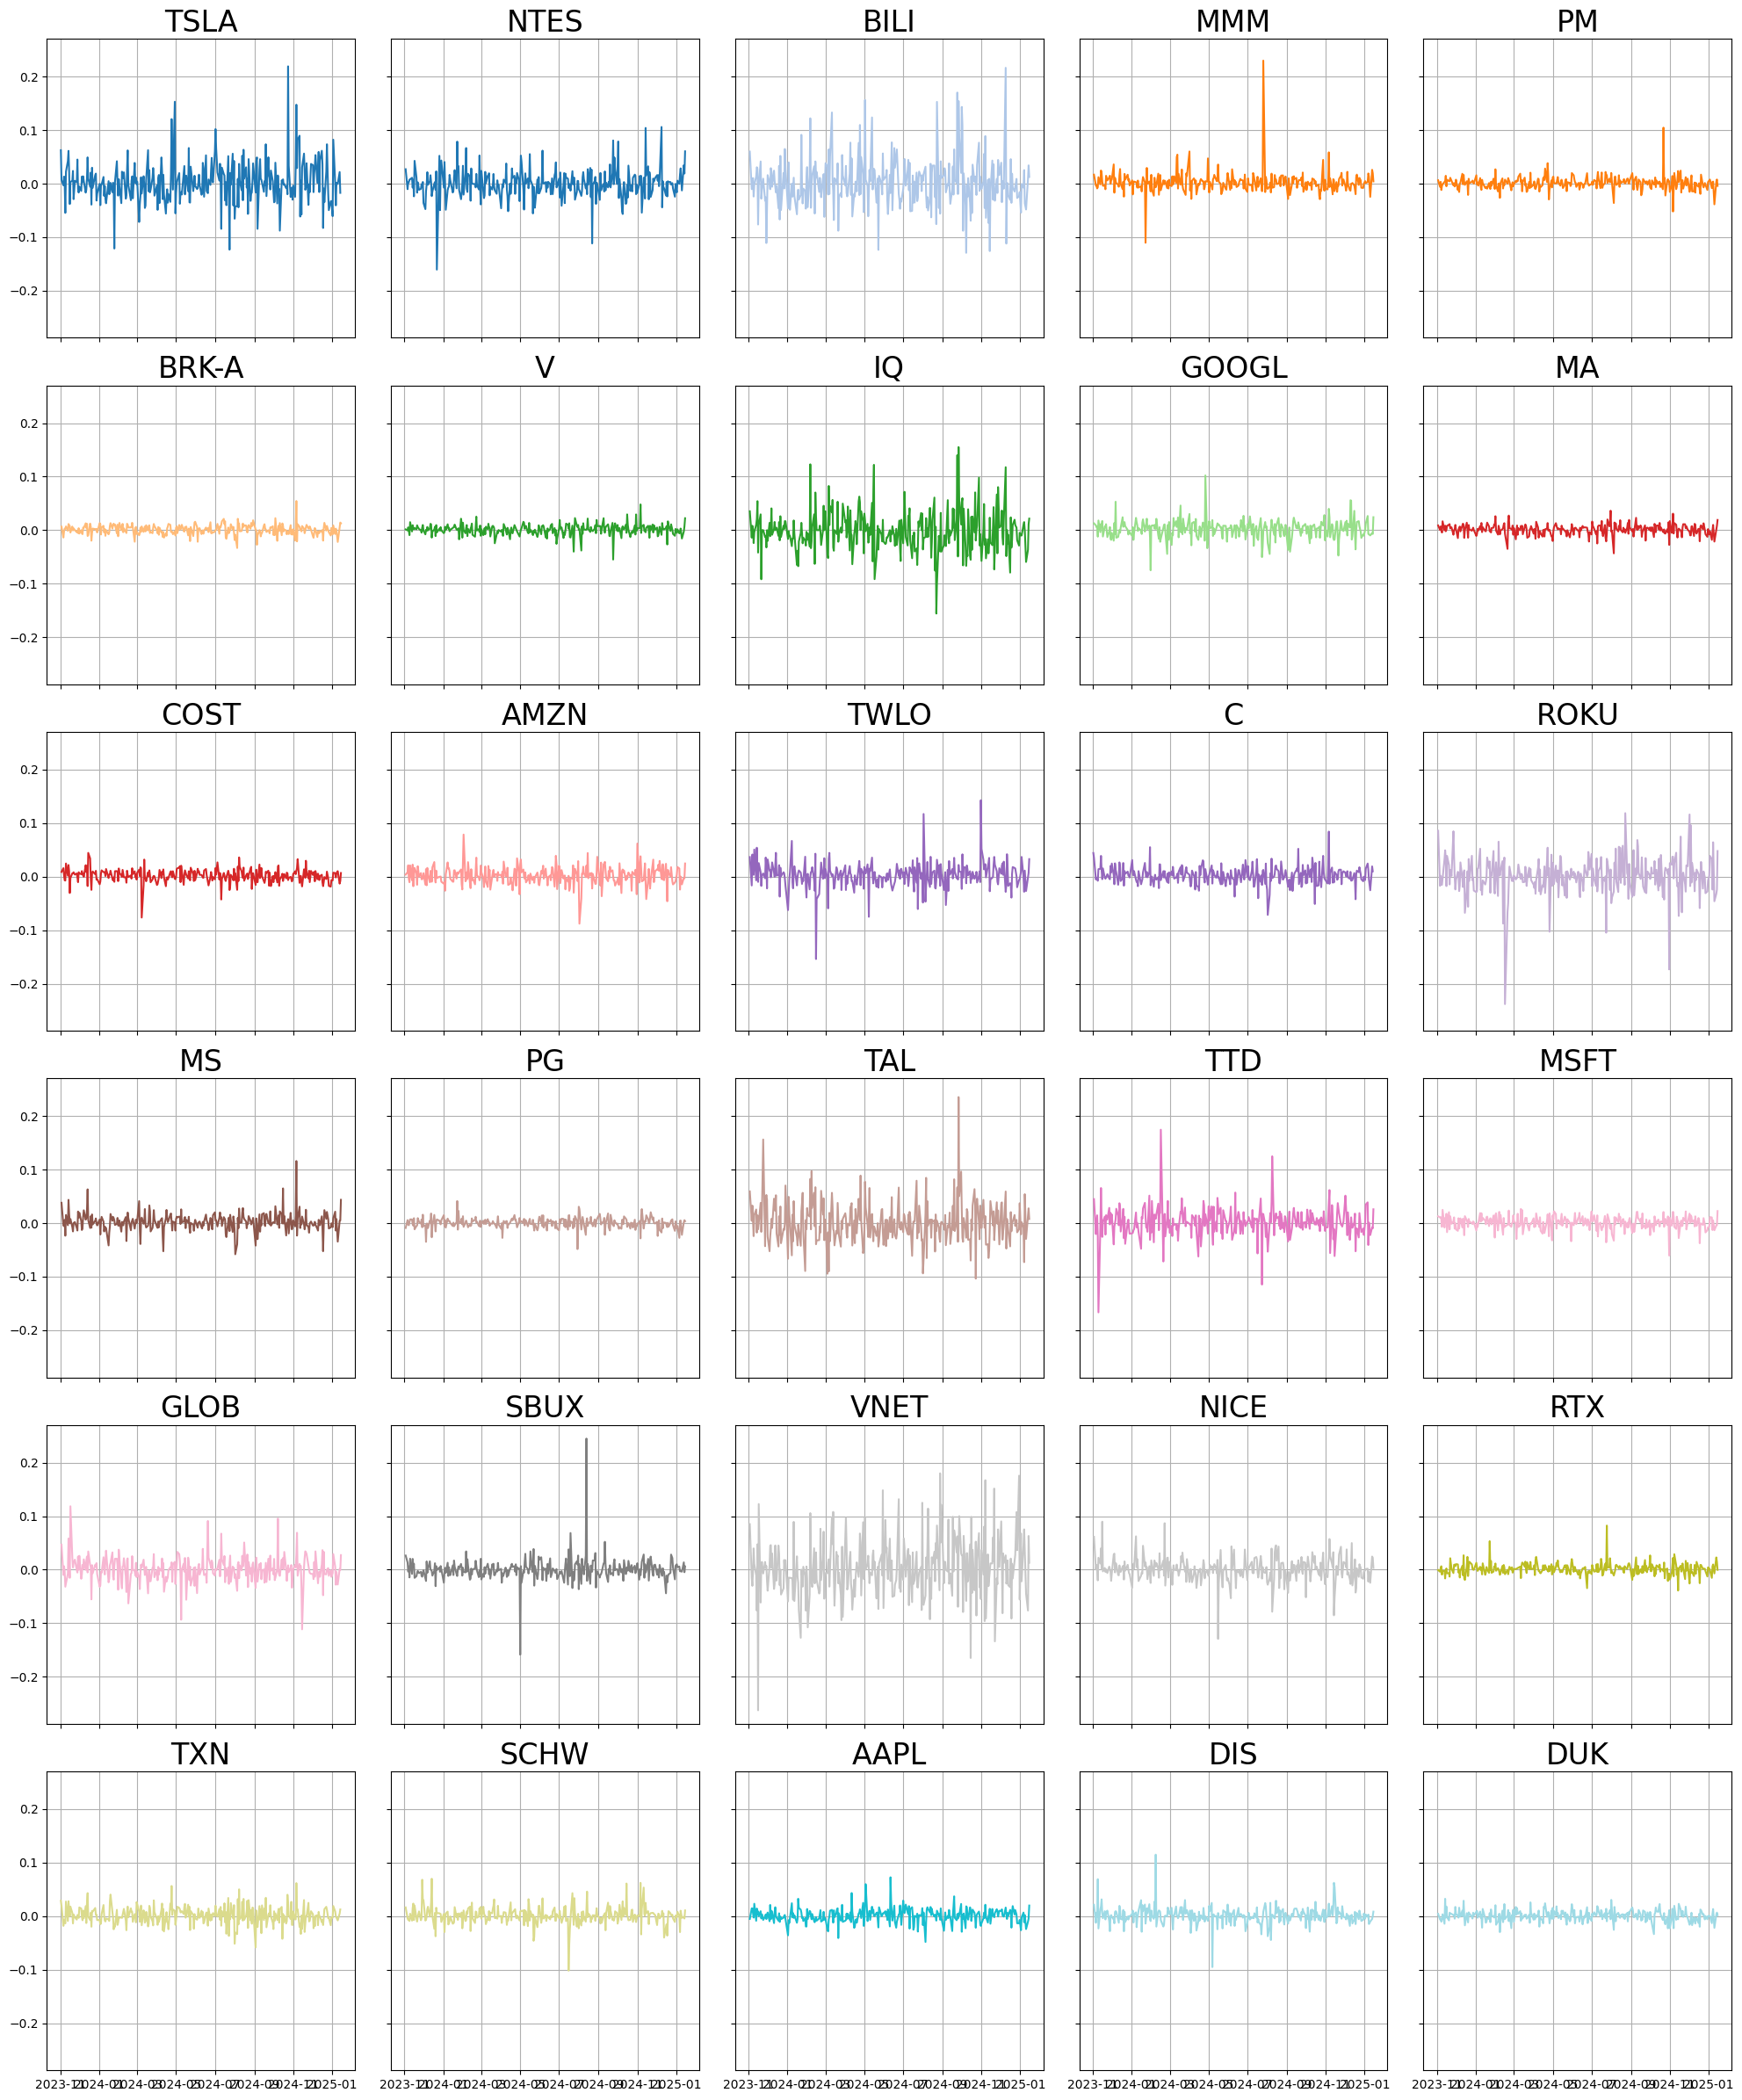

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get the list of unique tickers
tickers = combined_df['Ticker'].unique()

# Create a figure with subplots arranged in 5 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 24), sharex=True, sharey=True)
axes = axes.flatten()

# Generate a color map
colors = cm.get_cmap('tab20', len(tickers))

# Plot the last 300 daily returns for each ticker
for i, ticker in enumerate(tickers):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    axes[i].plot(ticker_data['Date'], ticker_data['Daily_Return'], label=ticker, color=colors(i))
    axes[i].set_title(ticker, fontsize=24)  # Increased font size by 2x
    axes[i].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Calculate covariance matrix and then PCA

Ticker          AAPL      AMZN      BILI     BRK-A         C      COST  \
Date                                                                     
2018-04-02 -0.006556 -0.052061  0.000000 -0.019024  0.003111 -0.030144   
2018-04-03  0.010259  0.014621 -0.008182  0.011724  0.011372 -0.000766   
2018-04-04  0.019122  0.013304  0.005500  0.010106  0.012120  0.015935   
2018-04-05  0.006934  0.029194  0.000912  0.006337  0.013129  0.003935   
2018-04-06 -0.025578 -0.032044 -0.003643 -0.025684 -0.023070 -0.012295   

Ticker           DIS       DUK      GLOB     GOOGL  ...       RTX      SBUX  \
Date                                                ...                       
2018-04-02 -0.017722 -0.004776 -0.031044 -0.023632  ... -0.018598 -0.028503   
2018-04-03  0.007703  0.002075 -0.022227  0.005975  ...  0.011581  0.031295   
2018-04-04  0.015389  0.005825 -0.013312  0.010828  ...  0.006885  0.014310   
2018-04-05  0.011491  0.011453  0.003528  0.002846  ... -0.000080  0.005269   
2018-04

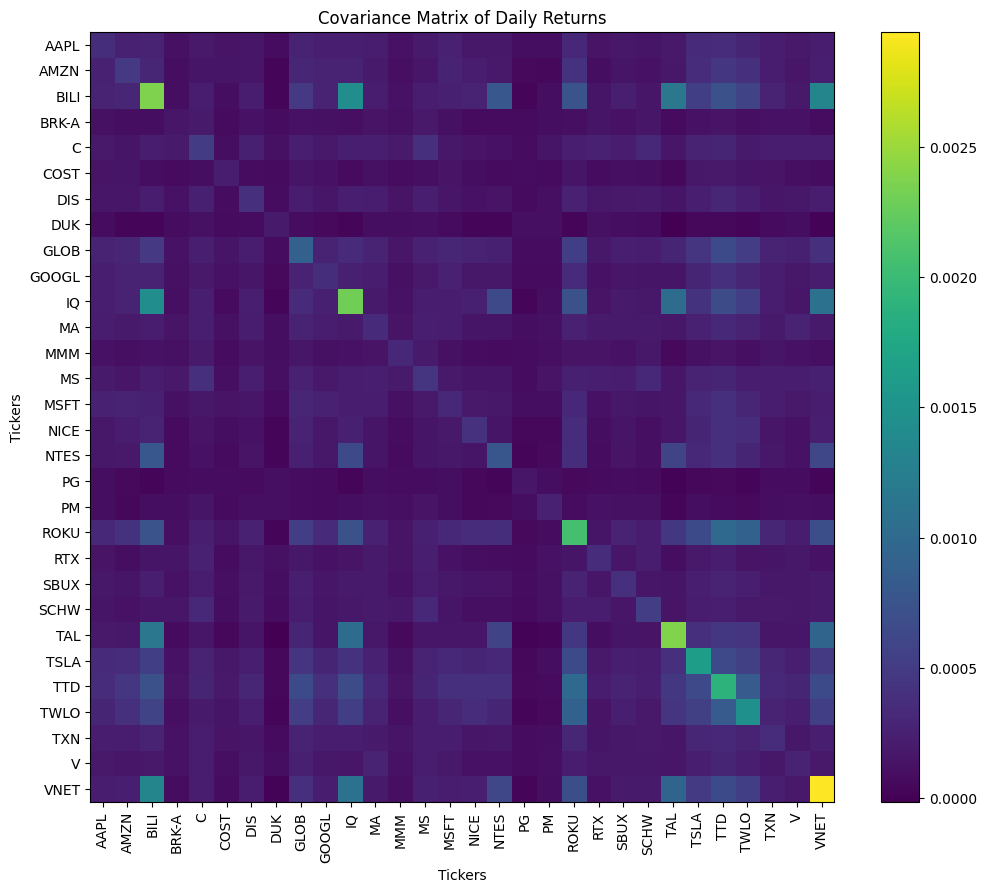

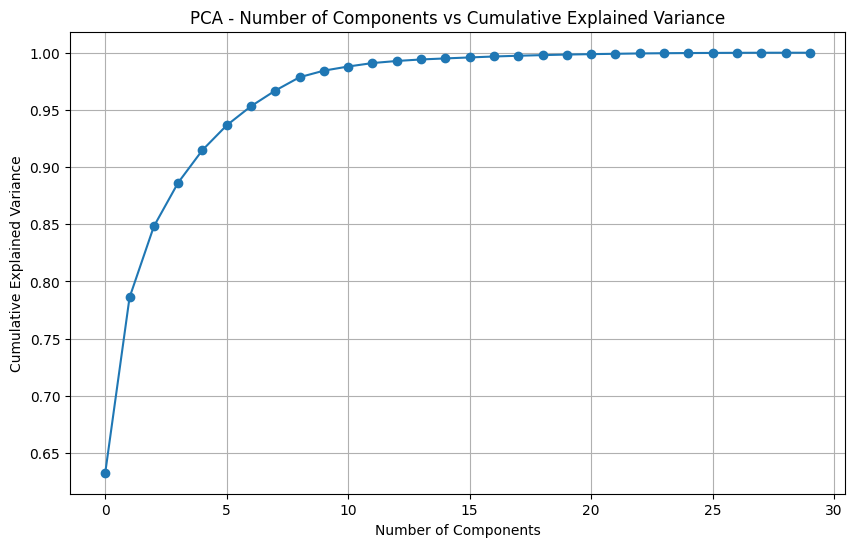

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ensure each 'Date' and 'Ticker' combination is unique by aggregating
combined_df = combined_df.groupby(['Date', 'Ticker']).agg({'Daily_Return': 'mean'}).reset_index()

# Pivot the DataFrame to get a matrix of daily returns
pivot_df = combined_df.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Check for NaN values and remove them
pivot_df.dropna(inplace=True)

print(pivot_df.head())

# Compute the covariance matrix of the daily returns
cov_matrix = pivot_df.cov()

# Verify the shape of the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)

# Plot the covariance matrix
plt.figure(figsize=(12, 10))
plt.imshow(cov_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Covariance Matrix of Daily Returns')
plt.xlabel('Tickers')
plt.ylabel('Tickers')
plt.xticks(ticks=np.arange(len(cov_matrix.columns)), labels=cov_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(cov_matrix.index)), labels=cov_matrix.index)
plt.grid(False)
plt.show()

# Apply PCA on the covariance matrix
pca = PCA()
pca.fit(cov_matrix)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Number of Components vs Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Plotting the first 30 daily and the total daily returns for each ticker in a single plot

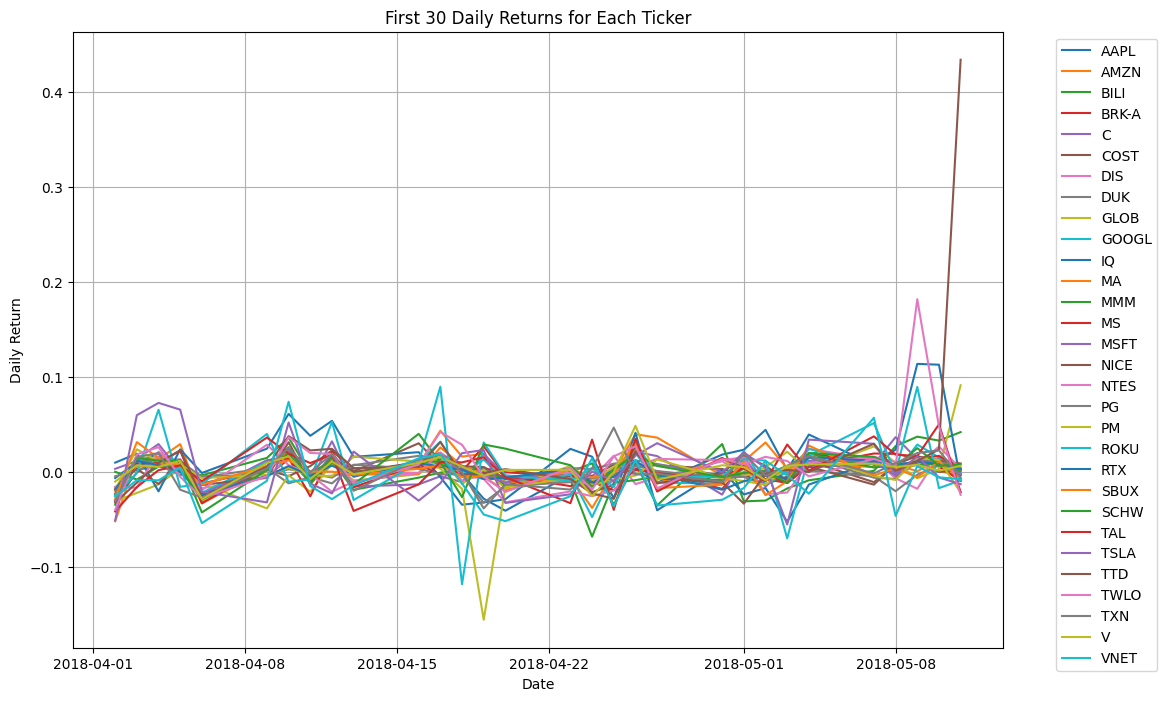

In [20]:
# Plot the first 30 daily returns for each ticker in a single plot
plt.figure(figsize=(12, 8))

for ticker in pivot_df.columns:
    ticker_data = pivot_df[ticker].head(30)
    plt.plot(ticker_data.index, ticker_data.values, label=ticker)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('First 30 Daily Returns for Each Ticker')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.show()


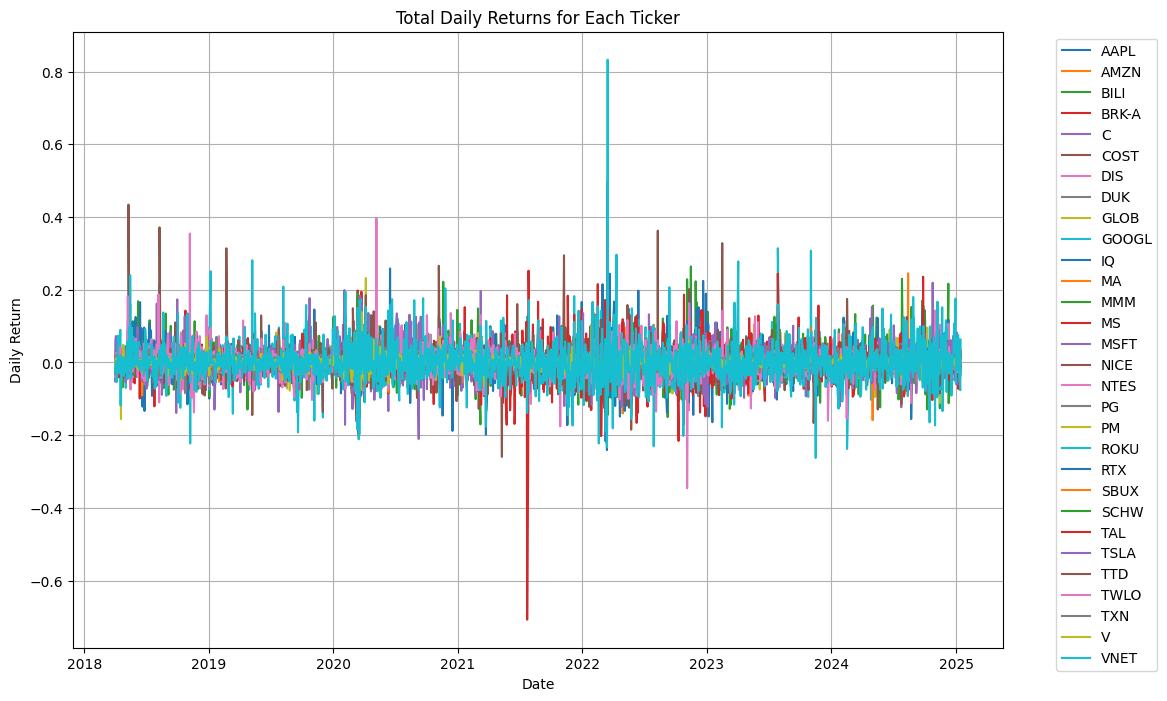

In [21]:
# Plot the total daily returns for each ticker in a single plot
plt.figure(figsize=(12, 8))

for ticker in pivot_df.columns:
    ticker_data = pivot_df[ticker]
    plt.plot(ticker_data.index, ticker_data.values, label=ticker)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Total Daily Returns for Each Ticker')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.show()

## SVD

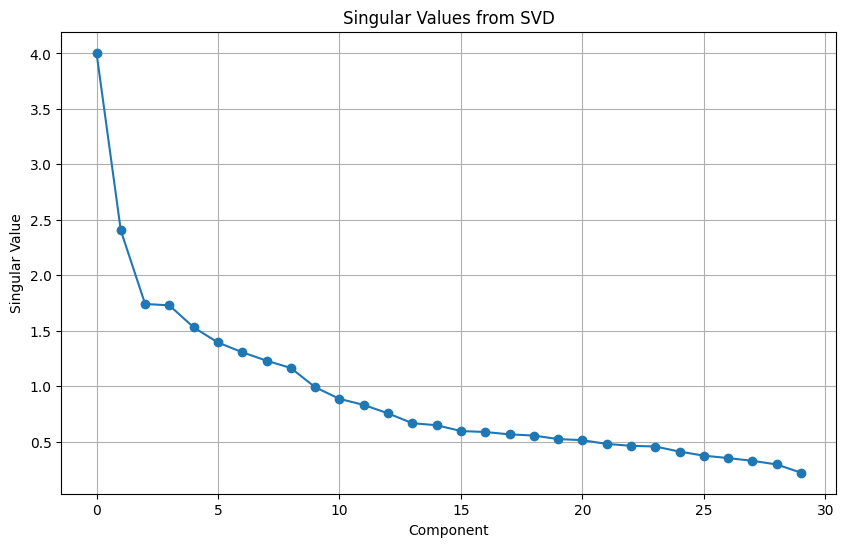

In [22]:
# Compute the Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(pivot_df, full_matrices=False)

# Plot the singular values
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.grid(True)
plt.show()


### Plotting the covariance matrix

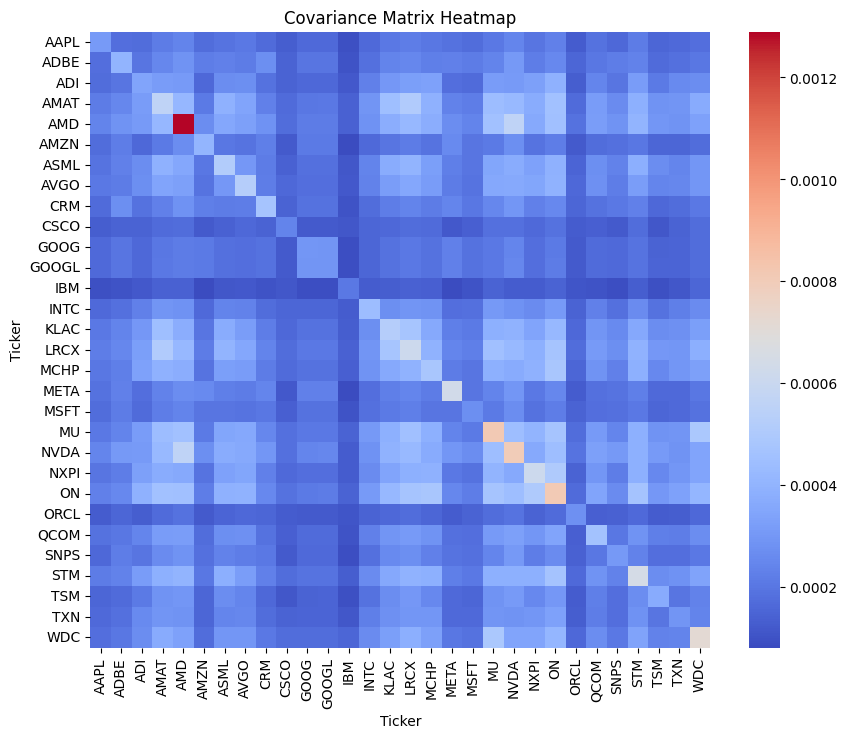

In [13]:
import seaborn as sns
# Plot the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()
